In [1]:
## importing the required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
## importing torchvision
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torchvision.utils import save_image
## importing matplotlib
import matplotlib.pyplot as plt
## importing numpy
import numpy as np
import pandas as pd

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
##MNIST Data Download
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root="~/torch_datasets", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="~/torch_datasets", train=False, transform=transform, download=True)
##Into DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/torch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/torch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/torch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/torch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
## model
class Autoencoder(nn.Module):
  def __init__(self,input_dim,hidden_dim,code_dim):
    super(Autoencoder,self).__init__()
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.code_dim = code_dim
    ## encoder

    self.encoder = nn.Sequential(
        nn.Linear(input_dim,hidden_dim),
        nn.ReLU(True),
        nn.Linear(hidden_dim,64),
        nn.ReLU(True),
        nn.Linear(64,12),
        nn.ReLU(True),
        nn.Linear(12,code_dim)
    )
    ## decoder

    self.decoder = nn.Sequential(
        nn.Linear(code_dim,12),
        nn.ReLU(True),
        nn.Linear(12,64),
        nn.ReLU(True),
        nn.Linear(64,hidden_dim),
        nn.ReLU(True),
        nn.Linear(hidden_dim,input_dim),
        nn.Tanh()
    )
  def forward(self,x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [5]:
model = Autoencoder(input_dim=28*28,hidden_dim=128,code_dim=3).to(device)
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3 ,weight_decay = 1e-9)


In [6]:
epochs = 100
outputs = []
for i in range(epochs):
  for data in train_loader:
    img, label = data
    img = img.reshape(img.size(0), -1).to(device)
    output = model(img)
    loss = loss_fnc(output,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("epoch [{}/{}], loss:{:.4f}".format(i + 1, epochs, loss.item()))
  outputs.append((i, img, output)) 



epoch [1/100], loss:0.0491
epoch [2/100], loss:0.0448
epoch [3/100], loss:0.0414
epoch [4/100], loss:0.0411
epoch [5/100], loss:0.0398
epoch [6/100], loss:0.0376
epoch [7/100], loss:0.0362
epoch [8/100], loss:0.0382
epoch [9/100], loss:0.0349
epoch [10/100], loss:0.0370
epoch [11/100], loss:0.0334
epoch [12/100], loss:0.0366
epoch [13/100], loss:0.0358
epoch [14/100], loss:0.0377
epoch [15/100], loss:0.0365
epoch [16/100], loss:0.0346
epoch [17/100], loss:0.0376
epoch [18/100], loss:0.0312
epoch [19/100], loss:0.0361
epoch [20/100], loss:0.0331
epoch [21/100], loss:0.0351
epoch [22/100], loss:0.0325
epoch [23/100], loss:0.0336
epoch [24/100], loss:0.0335
epoch [25/100], loss:0.0361
epoch [26/100], loss:0.0330
epoch [27/100], loss:0.0306
epoch [28/100], loss:0.0352
epoch [29/100], loss:0.0327
epoch [30/100], loss:0.0333
epoch [31/100], loss:0.0338
epoch [32/100], loss:0.0294
epoch [33/100], loss:0.0307
epoch [34/100], loss:0.0343
epoch [35/100], loss:0.0319
epoch [36/100], loss:0.0338
e

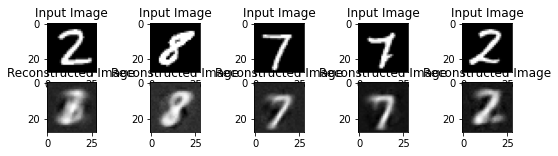

In [7]:
## plotting the reconstructed images
fig = plt.figure(figsize=(9, 2))
for k in range(0, 5):
    plt.subplot(2, 5, k + 1)
    plt.imshow(outputs[k][1][0].cpu().detach().numpy().reshape(28, 28), cmap="gray")
    plt.title("Input Image")
    plt.subplot(2, 5, k + 6)
    plt.imshow(outputs[k][2][0].cpu().detach().numpy().reshape(28, 28), cmap="gray")
    plt.title("Reconstructed Image")
